## OpenCV Fast Fourier Transform (FFT) for blur detection
- Ref : https://www.pyimagesearch.com/2020/06/15/opencv-fast-fourier-transform-fft-for-blur-detection-in-images-and-video-streams/

In [4]:
import cv2
import numpy as np
import os

from matplotlib import pyplot as plt

### Parameter

In [38]:
IMAGE_PATH = os.path.join('.', 'data', 'frame_00003_rgb.png')
BLUR_KERNEL = 19   # Radius of Gaussian blur kernel (For test purpose)
BLUR_RADIUS = 30  # Radius to extract high frequency components
BLUR_TH = 10      # Magnitude threshold of high frequency energy

### Blur Detection

In [36]:
def detect_blur_fft(image, size=60, thresh=10):
    # Get dimension
    h, w = image.shape
    cx, cy = int(w / 2), int(h / 2)

    # FFT
    spec = np.fft.fft2(image)
    spec_sft = np.fft.fftshift(spec)

    # High pass filter
    spec_sft[cy - size:cy + size, cx - size:cx + size] = 0

    # IFFT
    spec_hp = np.fft.ifftshift(spec_sft)
    image_hp = np.fft.ifft2(spec_hp)

    # Compute high frequency energy
    energy_hf = np.mean(20 * np.log(np.abs(image_hp)))

    # Plot 
    fig, ax = plt.subplots(1, 2, )
    ax[0].imshow(20 * np.log(np.abs(spec_sft) + 1e-6))
    ax[1].imshow(np.abs(image_hp))
    
    return energy_hf, energy_hf <= thresh

### Main Code

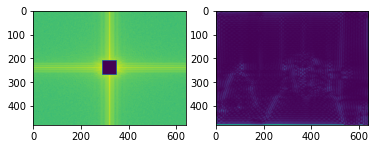

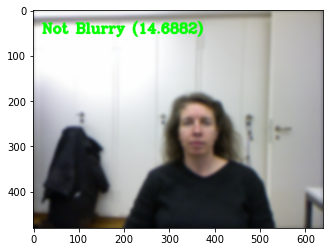

In [39]:
# Load image
im = cv2.imread(IMAGE_PATH)

# Blur (Test)
im = cv2.GaussianBlur(im, (BLUR_KERNEL, BLUR_KERNEL), 0)

# Blur detection
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
e_hf, flag_b = detect_blur_fft(gray, BLUR_RADIUS, BLUR_TH)

# Overlay
text = 'Blurry ({:.4f})' if flag_b else 'Not Blurry ({:.4f})'
text = text.format(e_hf)
color = (0, 0, 255) if flag_b else (0, 255, 0)
cv2.putText(im, text, (20, 50), cv2.FONT_HERSHEY_COMPLEX, 1, color, 4)

fig, ax = plt.subplots(1, 1)
ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))